In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset = train.flow_from_directory(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\training_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
test_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [21]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [22]:

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
 
model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset)


C:\Users\ezgie\AppData\Local\Temp\ipykernel_1520\3241751158.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/10
250/250 [==============================] - 349s 1s/step - loss: 0.6743 - accuracy: 0.5608 - val_loss: 0.6345 - val_accuracy: 0.6290
Epoch 2/10
250/250 [==============================] - 306s 1s/step - loss: 0.6361 - accuracy: 0.6227 - val_loss: 0.6215 - val_accuracy: 0.6550
Epoch 3/10
250/250 [==============================] - 314s 1s/step - loss: 0.5797 - accuracy: 0.6976 - val_loss: 0.5372 - val_accuracy: 0.7375
Epoch 4/10
250/250 [==============================] - 309s 1s/step - loss: 0.4966 - accuracy: 0.7549 - val_loss: 0.5046 - val_accuracy: 0.7535
Epoch 5/10
250/250 [==============================] - 296s 1s/step - loss: 0.4489 - accuracy: 0.7889 - val_loss: 0.4585 - val_accuracy: 0.7910
Epoch 6/10
250/250 [==============================] - 294s 1s/step - loss: 0.4008 - accuracy: 0.8138 - val_loss: 0.4419 - val_accuracy: 0.8015
Epoch 7/10
250/250 [==============================] - 297s 1s/step - loss: 0.3427 - accuracy: 0.8436 - val_loss: 0.4662 - val_accuracy: 0.7935

In [27]:

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)

1/1 [==============================] - 0s 35ms/step
[[0.]]


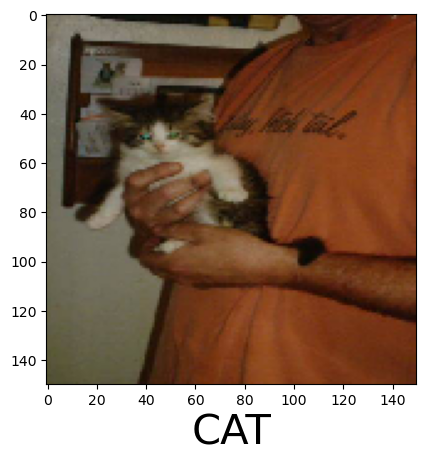

In [31]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\cats\cat.4002.jpg")

1/1 [==============================] - 0s 38ms/step
[[0.]]


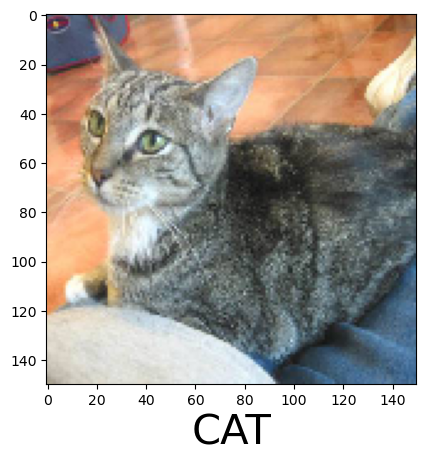

In [32]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\cats\cat.4028.jpg")

1/1 [==============================] - 0s 38ms/step
[[0.]]


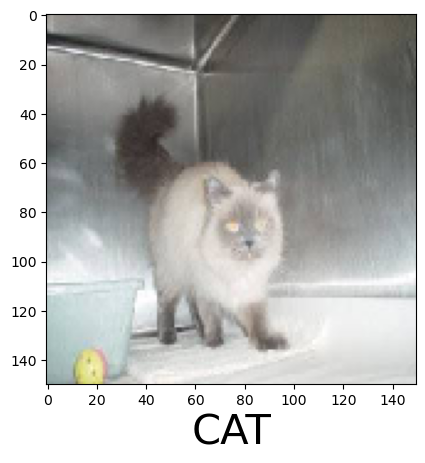

In [33]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\cats\cat.4147.jpg")

1/1 [==============================] - 0s 35ms/step
[[1.]]


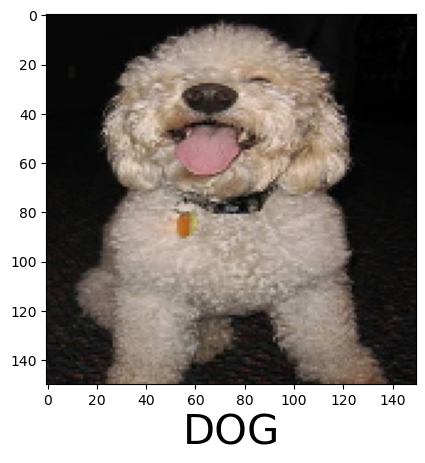

In [36]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\dogs\dog.4003.jpg")

1/1 [==============================] - 0s 35ms/step
[[0.]]


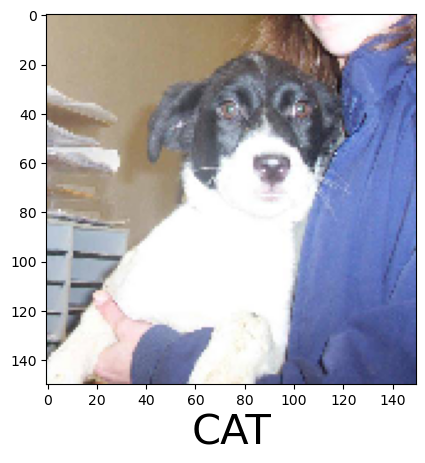

In [37]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\dogs\dog.4010.jpg")

1/1 [==============================] - 0s 39ms/step
[[1.]]


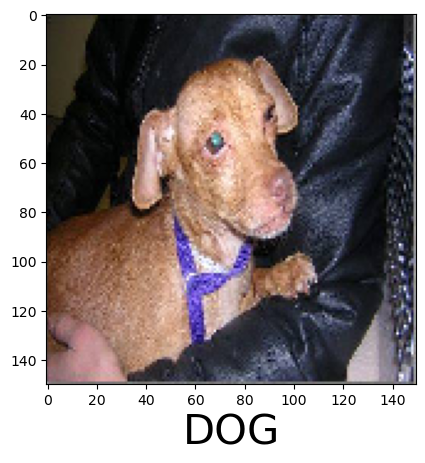

In [38]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\dogs\dog.4015.jpg")

1/1 [==============================] - 0s 36ms/step
[[1.]]


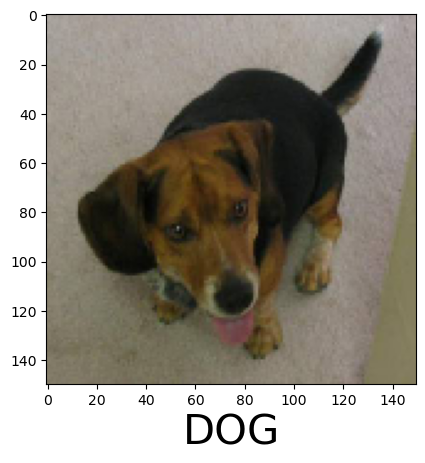

In [39]:
predictImage(r"C:\Users\ezgie\Desktop\Eğitim Dosyaları\datasets\dataset\test_set\dogs\dog.4020.jpg")